# Find the Measured Velocities


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from typing import Tuple
from datetime import datetime
from pathlib import Path


def recursive_root(path: str, find="sumo-uc-23"):
    if os.path.split(path)[-1] == find:
        return Path(path)
    return recursive_root(os.path.split(path)[0], find=find)


ROOT = recursive_root(os.path.abspath("."))
sys.path.append(str(ROOT))


## Read the SUMO Configurations


In [3]:
from src.walk_configs import walk_configs


In [4]:
experiment_path = Path(
    "/Volumes/BittleLab/7 DOE Project/sumo-uc-23/CarFollowingDefaults/EIDM_IDM_KraussAB"
)


In [17]:
configs = list(walk_configs(experiment_path))

### Read the File


In [27]:
import pandas as pd


def get_fuel(config, ) -> float:
    with open(config.Blocks.FuelTotalConfig.output_path) as f:
        return float(f.read())

In [48]:
fuel = [
    {
        "carFollowingModel": config.Blocks.CFSimpleConfig.cf_params.carFollowingModel,
        "seed": config.Blocks.SeedConfig.seed,
        'fuel': get_fuel(config),
    }
    for config in configs
]
fuel_df = pd.DataFrame(fuel)

SUMO_GASOLINE_GRAM_TO_JOULE: float = 43.4e-3

In [49]:
fuel_df['fuel'] = (fuel_df['fuel'] / SUMO_GASOLINE_GRAM_TO_JOULE) * 0.00133529

## Plot the Histograms

Text(0, 0.5, 'Density')

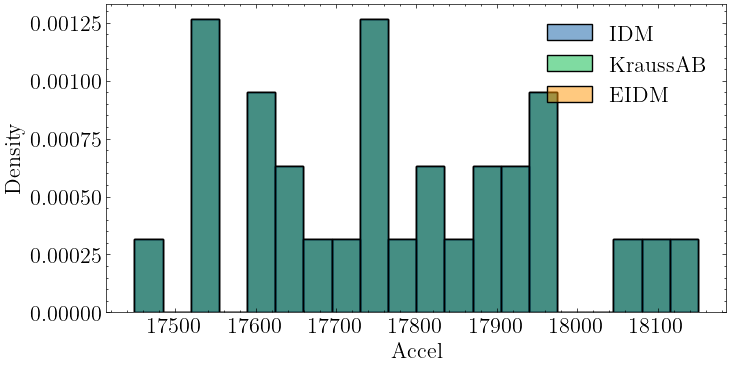

In [50]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns



plt.style.use('science')

fig, ax = plt.subplots(figsize=(8, 4))
# make the text bigger
plt.rcParams.update({'font.size': 16})

sns.histplot(data=fuel_df, x="fuel", hue="carFollowingModel", stat="density", ax=ax,  bins=20)
# remove the carFollowingModel title from the legend
ax.legend_.set_title(None)
# set the legend labels
# ax.legend(labels=["Real World", "SUMO"])
# # add the rw data
# accel_rw_df = rw_df[(rw_df["r2"] > 0.9) & (rw_df["type"] == "accel")]
# sns.histplot(data=accel_rw_df, x="slope", stat="density", ax=ax)

# # add a vertical line at the mean
# median_sumo = plot_df.loc[plot_df['carFollowingModel'] == "IDM", "slope"].median()
# median_rw = plot_df.loc[plot_df['carFollowingModel'] == "Real World", "slope"].median()
# ax.axvline(median_sumo, color="black", linestyle="--")
# ax.axvline(median_rw, color="black", linestyle="--")
# # add text to the vertical line
# ax.text(median_sumo, 0.5, f"SUMO: {median_sumo:.2f} $m/s^2$", rotation=0, va="center", ha="center")
# ax.text(median_rw, 0.8, f"RW: {median_rw:.2f} $m/s^2$", rotation=0, va="center", ha="center")



# set the x and y axis labels
ax.set_xlabel("Accel")
ax.set_ylabel("Density")
